# Notebook to process and visualize data about law faculty salaries & gender (Ontario)

Requirements:
    
    !pip install requests
    !pip install pandas
    !pip install seaborn
    !pip install matplotlib

License: [CC BY-NC 3.0](https://creativecommons.org/licenses/by-nc/3.0/)

In [19]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and clean Sunshine List data

In [20]:
# Load sunshine list data
request = requests.get('https://www.ontario.ca/public-sector-salary-disclosure/pssd-assets/files/2021/tbs-pssd-compendium-salary-disclosed-2021-en-utf-8-2023-01-05.json')
df_sunshine = pd.read_json(request.text)

# simplify first and last names for matching
df_sunshine['last_simple'] = df_sunshine['Last Name'].str.replace('[.,]', ' ', regex=True).str.strip()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.replace('\’', ' ', regex=True).str.strip()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.replace('\'', ' ').str.strip()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.split(' ').str[-1].str.strip().str.lower()
df_sunshine['last_simple'] = df_sunshine['last_simple'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Remove single quotes of various formats from Employer
df_sunshine['first_simple'] = df_sunshine['First Name'].str.replace('[.,]', ' ', regex=True).str.strip()
df_sunshine['first_simple'] = df_sunshine['first_simple'].str.split(' ').str[0].str.strip().str.lower()
df_sunshine['first_simple'] = df_sunshine['first_simple'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Remove single quotes of various formats from Employer
df_sunshine['Employer'] = df_sunshine['Employer'].str.replace('\’', '', regex=True).str.strip()
df_sunshine

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,last_simple,first_simple
0,Colleges,Abboud,Nadim,116977.21,126.77,Algonquin College Of Applied Arts and Technology,Professor,2021,abboud,nadim
1,Colleges,Agate,Jeffrey,138280.53,392.33,Algonquin College Of Applied Arts and Technology,Associate Director Student Support Services,2021,agate,jeffrey
2,Colleges,Al Dabbah,Rayan,107206.59,21.77,Algonquin College Of Applied Arts and Technology,Professor,2021,dabbah,rayan
3,Colleges,Alexander,Doug,115377.97,126.77,Algonquin College Of Applied Arts and Technology,Professor,2021,alexander,doug
4,Colleges,Alexander,Tamra,116834.24,74.36,Algonquin College Of Applied Arts and Technology,Professor,2021,alexander,tamra
...,...,...,...,...,...,...,...,...,...,...
244451,Universities,Zikic,Jelena,239448.12,1022.64,York University,Associate Professor / Graduate Program Director,2021,zikic,jelena
244452,Universities,Zoidl,"Georg, R",232680.24,1065.36,York University,Professor,2021,zoidl,georg
244453,Universities,Zryd,Michael,176267.22,940.20,York University,Associate Professor / Graduate Program Director,2021,zryd,michael
244454,Universities,Zwick,Detlev,354142.06,1065.36,York University,Dean / Associate Professor,2021,zwick,detlev


### Load and clean faculty bios data

NOTE: to update, run scrape_bios.ipynb

In [21]:
# Load faculty bios from json
df = pd.read_json('data/all_bios.json')

# Clean data for matching with sunshine list

# rename universities to match sunshine list
universities = {
    'osgoode': 'York University',
    'u_toronto': 'University Of Toronto',
    'tmu': 'Ryerson University',
    'queens': 'Queens University',
    'western': 'University Of Western Ontario',
    'windsor': 'University Of Windsor',
    'uottawa-common': 'University Of Ottawa',
    'uottawa-civil': 'University Of Ottawa',
    'lakehead': 'Lakehead University',

    }
df['university'] = df['faculty'].apply(lambda x: universities[x])

# simplify first and last names for matching
df['name_simple'] = df['name'].str.replace('[.,]', ' ', regex=True).str.strip()
df['name_simple'] = df['name_simple'].str.replace('’', ' ', regex = True).str.strip()
df['name_simple'] = df['name_simple'].str.replace('\'', ' ').str.strip()
df['last_name'] = df['name_simple'].apply(lambda x: x.split(' ')[-1]).str.strip().str.lower()
df['first_name'] = df['name_simple'].apply(lambda x: x.split(' ')[0]).str.strip().str.lower()
df['last_name'] = df['last_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['first_name'] = df['first_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Manual changes do to variations in names
df.loc[df['name'] == 'Jonathon Penney', 'first_name'] = 'jon'
df.loc[df['name'] == 'Jim Phillips', 'first_name'] = 'james'
df.loc[df['name'] == 'Timothy J. Bartkiw', 'first_name'] = 'tim'
df.loc[df['name'] == 'Sharry Aiken', 'first_name'] = 'sharryn'
df.loc[df['name'] == 'Will Kymlicka', 'first_name'] = 'william'
df.loc[df['name'] == 'Chi Carmody', 'first_name'] = 'chios'
df.loc[df['name'] == 'Akis Psygkas', 'first_name'] = 'athanasios'
df.loc[df['name'] == 'Jeff Berryman', 'first_name'] = 'jeffrey'
df.loc[df['name'] == 'Patricia Galvão Ferreira', 'last_name'] = 'galvao-ferreira'
df.loc[df['name'] == 'Tess Sheldon', 'first_name'] = 'c'
df.loc[df['name'] == 'Yin-Yuan Chen', 'first_name'] = 'yin'
df.loc[df['name'] == 'P M Vasudev', 'first_name'] = 'palladam'
df.loc[df['name'] == 'Marel Katsivela', 'first_name'] = 'maria'
df.loc[df['name'] == 'John Packer', 'first_name'] = 'frederick'
df.loc[df['name'] == 'Muriel Paradelle', 'first_name'] = 'murielle'

print(df.university.value_counts())

#df


University Of Ottawa             112
York University                   63
University Of Toronto             62
Queens University                 39
University Of Western Ontario     39
University Of Windsor             34
Ryerson University                21
Lakehead University               14
Name: university, dtype: int64


### Merge datasets

In [22]:
# Merge df_sunshine and df using last_name, first_name and university from df, and Employer, Last Name and First Name from df_sunshine

df_merged = df.merge(df_sunshine, left_on=['last_name', 'first_name', 'university'], right_on=['last_simple', 'first_simple', 'Employer'])

# rename university values
# universities = {'York University': 'Osgoode Hall', 'University Of Toronto': 'University of Toronto', 'Ryerson University': 'Lincoln Alexander'}
# df_merged['university'] = df_merged['university'].apply(lambda x: universities[x])

# change column 'Job Title' to 'title_sunshine'

df_merged = df_merged.rename(columns={'Job Title': 'Title'})

# keep only needed columns
df_merged = df_merged[['name', 'university', 'faculty', 'href', 'bio', 'Title', 'Salary' ]]

# Remove uottawa-civil
df_merged = df_merged[df_merged['faculty'] != 'uottawa-civil']

print(df_merged.university.value_counts())

#print number in df but not in df_merged
print()
print('Num in df but not in df_merged:')
print(len(df) - len(df_merged))
print()
df_merged


University Of Ottawa             66
York University                  55
University Of Toronto            52
Queens University                37
University Of Western Ontario    30
University Of Windsor            27
Ryerson University               14
Lakehead University              11
Name: university, dtype: int64

Num in df but not in df_merged:
92



,name,university,faculty,href,bio,Title,Salary
0,Saptarishi Bandopadhyay,York University,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,I am an Associate Professor at Osgoode Hall La...,Assistant Professor,139560.24
1,Stephanie Ben-Ishai,York University,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Stephanie Ben-Ishai is a Distinguish...,Professor,248584.79
2,Benjamin L. Berger,York University,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Benjamin L. Berger is Professor and ...,Professor,232562.47
3,Kate Glover Berger,York University,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Kate Glover Berger joined the facult...,Assistant Professor,115342.67
4,Faisal Bhabha,York University,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Faisal Bhabha is an Associate Professor at Osg...,Associate Professor,171136.45
...,...,...,...,...,...,...,...
287,Darren O'Toole,University Of Ottawa,uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,"Professor O’Toole teaches Aboriginal Law, Indi...",Professeur(e) agrégé(e) / Associate Professor,134198.40
288,Alain Roussy,University Of Ottawa,uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,Alain Roussy is currently Vice-Dean of the Fre...,Doyen(ne) / Dean,186071.20
289,Teresa Scassa,University Of Ottawa,uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,Dr. Teresa Scassa is the Canada Research Chair...,Chaire de recherche du Canada / Canada Researc...,217335.76
290,Stéphane Sérafin,University Of Ottawa,uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,Stéphane Sérafin is a graduate of the Programm...,Professeur(e) adjoint(e) / Assistant Professor,106224.96


In [10]:
# Show professors in df but not df_merged
df_missing = df[~df['name'].isin(df_merged['name'])]
df_missing

,faculty,name,title,email,href,bio,listed_research_areas,university,name_simple,last_name,first_name
0,osgoode,Rabiat Akande,Assistant Professor,rakande@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Rabiat Akande works in the fields of...,legal history; law and religion; constitutiona...,York University,Rabiat Akande,akande,rabiat
10,osgoode,Suzanne Chiodo,Assistant Professor,schiodo@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Suzanne Chiodo’s areas of teaching a...,civil procedure; access to justice; class acti...,York University,Suzanne Chiodo,chiodo,suzanne
11,osgoode,Barnali Choudhury,"Professor and Director, Jack & Mae Nathanson C...",bchoudhury@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Barnali Choudhury is a Professor of Law and th...,Corporate Law; Business & Human Rights; Corpor...,York University,Barnali Choudhury,choudhury,barnali
15,osgoode,Signa A. Daum Shanks,Associate Professor,sdaumshanks@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,Signa A. Daum Shanks started at Osgoode in 201...,Law and Economics; Indigenous Governance; Lega...,York University,Signa A Daum Shanks,shanks,signa
16,osgoode,Valerio De Stefano,Canada Research Chair in Innovation Law and So...,vdestefano@osgoode.yorku.ca,https://www.osgoode.yorku.ca/faculty-and-staff...,"Professor Valerio De Stefano, PhD, joined Osgo...",Labour Law; Employment Law; Law and Technology...,York University,Valerio De Stefano,stefano,valerio
...,...,...,...,...,...,...,...,...,...,...,...
378,uottawa-civil,Jennifer Quaid,Professeure agrégée et vice-doyenne à la reche...,Jennifer.Quaid@uottawa.ca,https://www.uottawa.ca/faculte-droit/droit-civ...,Jennifer Quaid est professeure agrégée et vice...,None,University Of Ottawa,Jennifer Quaid,quaid,jennifer
379,uottawa-civil,David Robitaille,Professeur titulaire,david.robitaille@uottawa.ca,https://uniweb.uottawa.ca/members/1670/profile,David Robitaille est professeur titulaire à la...,None,University Of Ottawa,David Robitaille,robitaille,david
380,uottawa-civil,Terry Skolnik,Professeur agrégé,tskolnik@uottawa.ca,https://uniweb.uottawa.ca/members/4305/profile,Terry Skolnik is an associate professor (tenur...,None,University Of Ottawa,Terry Skolnik,skolnik,terry
381,uottawa-civil,Marie-Eve Sylvestre,"Doyenne, professeure titulaire",Marie-Eve.Sylvestre@uottawa.ca,https://www.uottawa.ca/faculte-droit/droit-civ...,Marie-Eve Sylvestre est doyenne et professeure...,None,University Of Ottawa,Marie-Eve Sylvestre,sylvestre,marie-eve


In [23]:
# Save merged data to json
df_merged.to_json('data/ontario_bios_w_salaries.json')

### Analysis of salaries of Toronto law professors

In [49]:
# Read merged data
df_merged = pd.read_json('data/ontario_bios_w_salaries.json')

# restrict to Toronto faculty
toronto_faculties = ['University Of Toronto', 'York University', 'Ryerson University']
df_merged = df_merged[df_merged['university'].isin(toronto_faculties)]

In [50]:
# get average Salary for each university in df_merged
print ('Mean Salary by University')
print(df_merged.groupby('university')['Salary'].mean())
print()
print ('Median Salary by University')
print(df_merged.groupby('university')['Salary'].median())
print()
print ('-------------------------')
print()

# NOTE: pronouns from ontario below are better than this version, b/c fix some mistakes
def get_pronouns(text):

    # Create a dictionary to keep track of the count of each pronoun
    pronoun_count = {"he": 0, "him": 0, "his": 0, "she": 0, "her": 0, "hers": 0, "they": 0, "them": 0, "their": 0, "theirs": 0}

    # prepare the text for analysis
    text = text.lower().split()

    # count the pronouns
    for word in text:
        if word in pronoun_count:
            pronoun_count[word] += 1

    # if no pronouns, return "other"
    if sum(pronoun_count.values()) == 0:
        return "other"

    # Get the most common pronouns
    most_common_pronoun = max(pronoun_count, key=pronoun_count.get)
    if most_common_pronoun in ["he", "him", "his"]:
        return "he/him"
    elif most_common_pronoun in ["she", "her", "hers"]:
        return "she/her"
    else:
        return "they/them"

# get pronouns for each bio using apply
df_merged['pronouns'] = df_merged['bio'].apply(get_pronouns)

# create new df with only pronouns and salary, and print value counts
df_pronouns = df_merged.copy()
print ('Pronouns used in bios')
print(df_pronouns.value_counts('pronouns'))
print()
print ('-------------------------')
print()

# Remove 'other' because this means no pronouns used in bio (e.g. first person or bio missing)
df_pronouns = df_pronouns[df_pronouns['pronouns'] != 'other']

# Note: No they/them pronouns used in any bios

# get mean and median salary for each pronoun
print('Mean Salary by Pronouns')
print(df_pronouns.groupby('pronouns')['Salary'].mean())
print()
print ('Median Salary by Pronouns')
print(df_pronouns.groupby('pronouns')['Salary'].median())
print()
print ('-------------------------')
print()

# get median salary for each pronoun, per university 
print('Mean Salary by Pronouns and University')
print(df_pronouns.groupby(['university', 'pronouns'])['Salary'].mean())
print()
print('Median Salary by Pronouns and University')
print(df_pronouns.groupby(['university', 'pronouns'])['Salary'].median())




Mean Salary by University
university
Ryerson University       177123.845714
University Of Toronto    248598.171731
York University          208585.456364
Name: Salary, dtype: float64

Median Salary by University
university
Ryerson University       174953.595
University Of Toronto    240436.975
York University          209695.770
Name: Salary, dtype: float64

-------------------------

Pronouns used in bios
pronouns
he/him     62
she/her    57
other       2
dtype: int64

-------------------------

Mean Salary by Pronouns
pronouns
he/him     229750.853710
she/her    216321.293333
Name: Salary, dtype: float64

Median Salary by Pronouns
pronouns
he/him     210092.985
she/her    218815.440
Name: Salary, dtype: float64

-------------------------

Mean Salary by Pronouns and University
university             pronouns
Ryerson University     he/him      175398.265000
                       she/her     178418.031250
University Of Toronto  he/him      250625.413636
                       she/her 

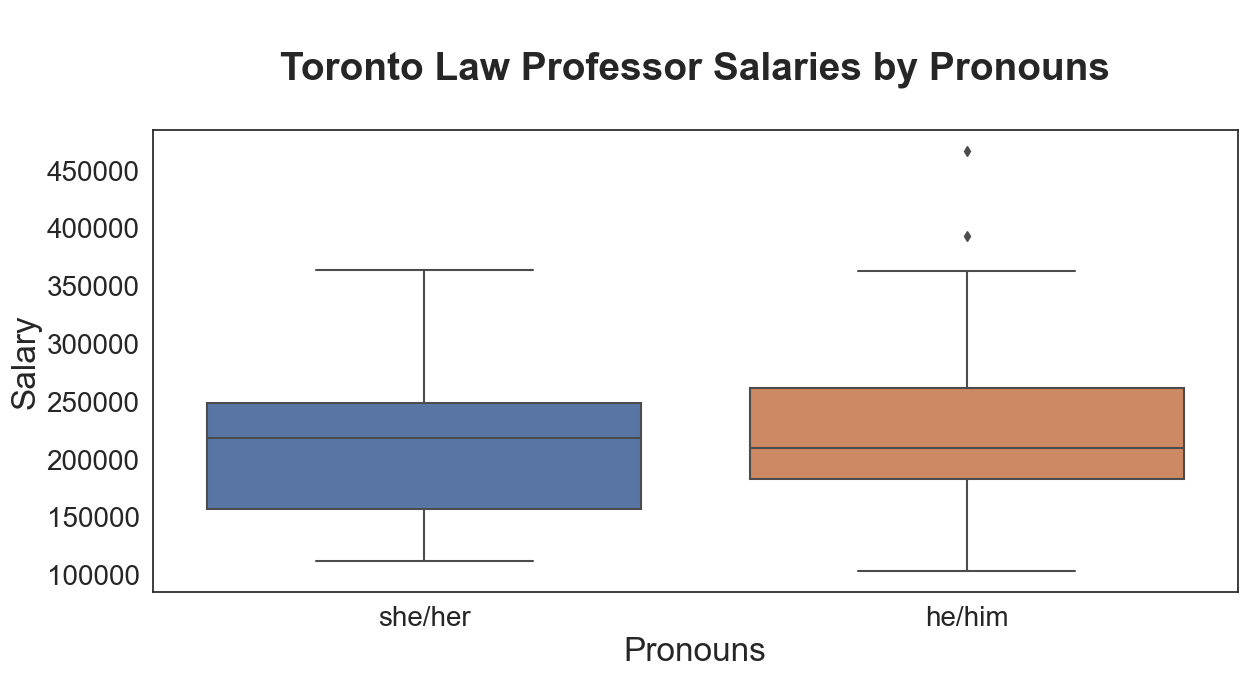

In [51]:
# graph the distribution of salaries for each pronoun
sns.set_palette('husl')
sns.set_theme(style="white")
ax = sns.boxplot(x="pronouns", y="Salary", data=df_pronouns)
ax.set_title('\nToronto Law Professor Salaries by Pronouns\n', fontweight='bold', fontsize=28)
ax.set_xlabel('Pronouns', fontsize=24)
ax.set_ylabel('Salary', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().set_size_inches(14, 6)
plt.show()

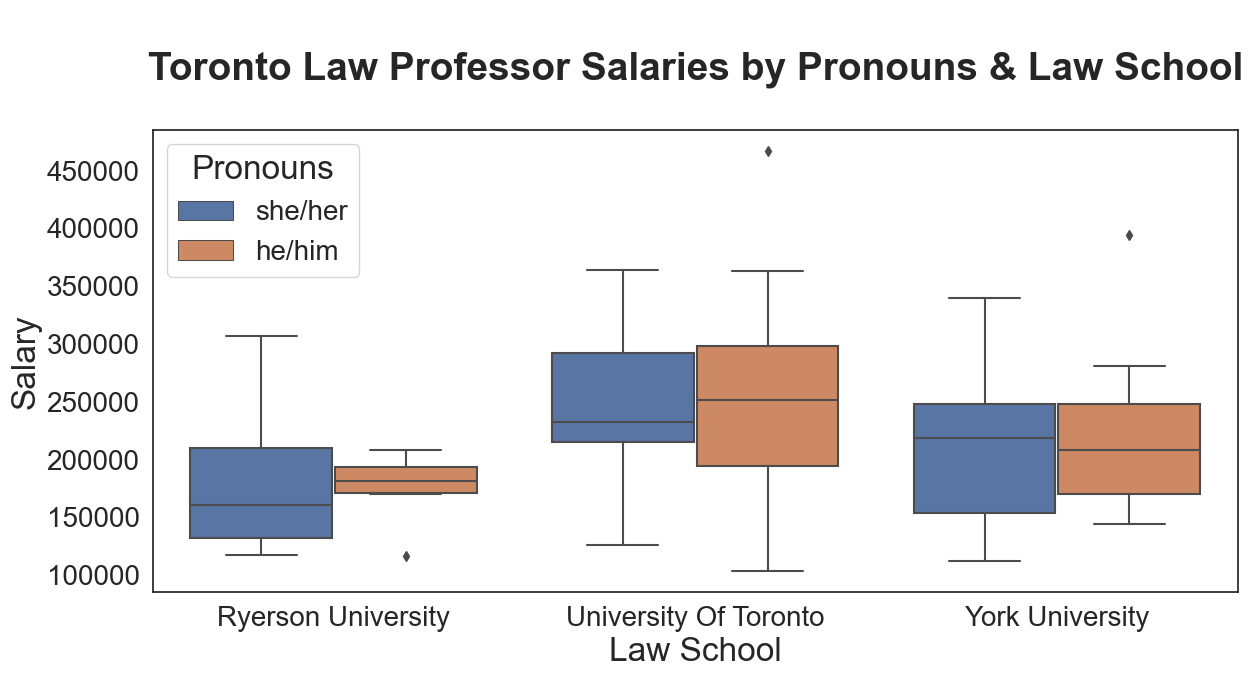

In [52]:
# graph the distribution of salaries for each pronoun, broken down by university
sns.set_theme(style="white")
university_order = df_pronouns['university'].sort_values().unique()
ax = sns.boxplot(x="university", y="Salary", hue="pronouns", data=df_pronouns, order=university_order)
ax.set_title('\nToronto Law Professor Salaries by Pronouns & Law School\n', fontweight='bold', fontsize=28)
ax.set_xlabel('Law School', fontsize=24)
ax.set_ylabel('Salary', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().set_size_inches(14, 6)
ax.legend(title='Pronouns', fontsize=20, title_fontsize=24)
plt.show()

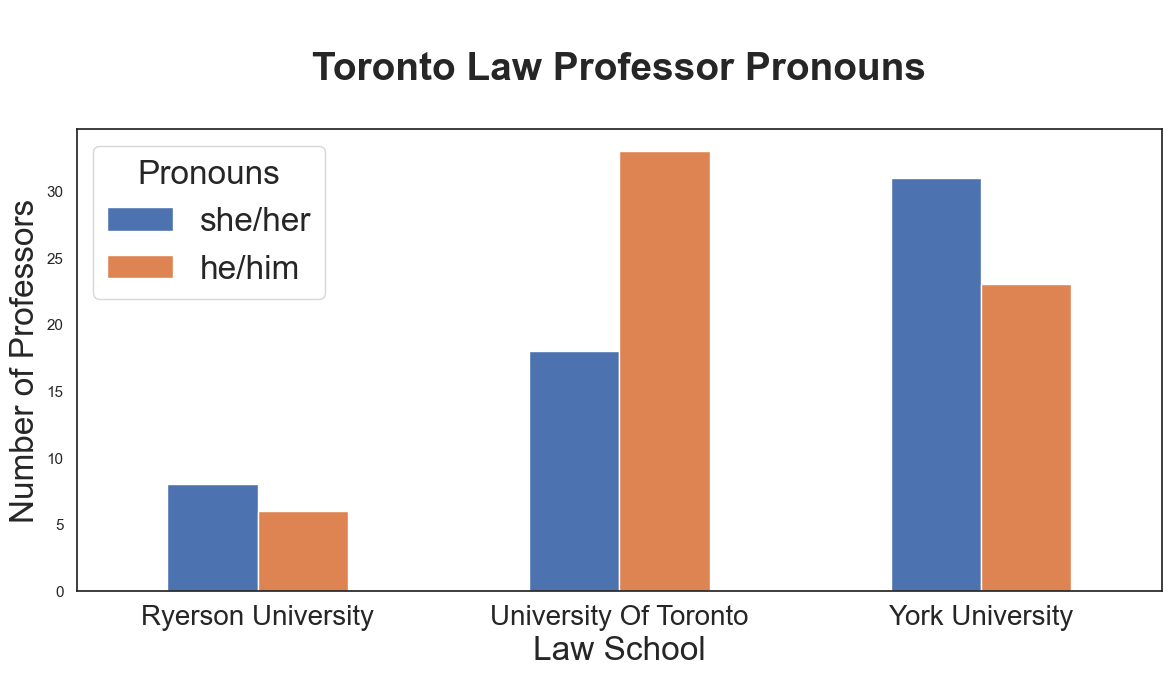

In [53]:
# modify the order of the columns in the DataFrame so that pronouns appear in same order as in the boxplots
df_pronouns = df_pronouns.pivot_table(index='university', columns='pronouns', aggfunc='size')
df_pronouns = df_pronouns[['she/her', 'he/him']]

# bar chart with the number of professors with each pronoun, broken down by university
sns.set_palette('husl')
sns.set_theme(style="white")
df_pronouns.plot(kind='bar', stacked=False)
plt.xlabel('Law School', fontsize=24)
plt.ylabel('Number of Professors', fontsize=24)
plt.xticks(rotation=0, ha='center', fontsize=20)
plt.gcf().set_size_inches(14, 6)
plt.title('\nToronto Law Professor Pronouns\n', fontweight='bold', fontsize=28)
plt.legend(title='Pronouns', fontsize=24, title_fontsize=24)
plt.show()

### Individual Schools

In [40]:
df_merged[df_merged['university']== 'Osgoode Hall'].sort_values('Salary', ascending=False)

,name,university,href,bio,Title,Salary,pronouns


In [41]:
df_merged[df_merged['university']== 'Lincoln Alexander'].sort_values('Salary', ascending=False)

,name,university,href,bio,Title,Salary,pronouns


In [42]:

df_merged[df_merged['university']== 'University of Toronto'].sort_values('Salary', ascending=False)

,name,university,href,bio,Title,Salary,pronouns


### Visualize Ontario

NOTE: Not currently working for U Ottawa, because of (a) missing bios and (b) french bios that get categorized as pronouns other.

CONSIDER: creating a new script to look for pronouns in the french bios, though that is more complicated and in some places requires inferences 

OR

Remove Ottawa Civil Law from the mix, and make this about common law schools in Ontario.



In [24]:
# Read merged data
df_merged = pd.read_json('data/ontario_bios_w_salaries.json')

universities = {
    'University Of Toronto': 'U of T',
    'York University': 'Osgoode Hall',
    'Queens University': 'Queen\'s',
    'Ryerson University': 'Lincoln Alexander',
    'University Of Western Ontario': 'Western',
    'University Of Windsor': 'Windsor',
    'University Of Ottawa': 'Ottawa (Common Law)',
    'Lakehead University': 'Bora Laskin',
}

df_merged['university'] = df_merged['university'].map(universities)
df_merged

,name,university,faculty,href,bio,Title,Salary
0,Saptarishi Bandopadhyay,Osgoode Hall,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,I am an Associate Professor at Osgoode Hall La...,Assistant Professor,139560.24
1,Stephanie Ben-Ishai,Osgoode Hall,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Stephanie Ben-Ishai is a Distinguish...,Professor,248584.79
2,Benjamin L. Berger,Osgoode Hall,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Benjamin L. Berger is Professor and ...,Professor,232562.47
3,Kate Glover Berger,Osgoode Hall,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Professor Kate Glover Berger joined the facult...,Assistant Professor,115342.67
4,Faisal Bhabha,Osgoode Hall,osgoode,https://www.osgoode.yorku.ca/faculty-and-staff...,Faisal Bhabha is an Associate Professor at Osg...,Associate Professor,171136.45
...,...,...,...,...,...,...,...
287,Darren O'Toole,Ottawa (Common Law),uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,"Professor O’Toole teaches Aboriginal Law, Indi...",Professeur(e) agrégé(e) / Associate Professor,134198.40
288,Alain Roussy,Ottawa (Common Law),uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,Alain Roussy is currently Vice-Dean of the Fre...,Doyen(ne) / Dean,186071.20
289,Teresa Scassa,Ottawa (Common Law),uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,Dr. Teresa Scassa is the Canada Research Chair...,Chaire de recherche du Canada / Canada Researc...,217335.76
290,Stéphane Sérafin,Ottawa (Common Law),uottawa-common,https://www.uottawa.ca/faculty-law/common-law/...,Stéphane Sérafin is a graduate of the Programm...,Professeur(e) adjoint(e) / Assistant Professor,106224.96


In [25]:
# get average Salary for each university in df_merged
print ('Mean Salary by University')
print(df_merged.groupby('university')['Salary'].mean())
print()
print ('Median Salary by University')
print(df_merged.groupby('university')['Salary'].median())
print()
print ('-------------------------')
print()


def get_pronouns(text):

    if not text:
        return "other"

    # Create a dictionary to keep track of the count of each pronoun
    pronoun_count = {"he": 0, "him": 0, "his": 0, "she": 0, "her": 0, "hers": 0, "they": 0, "them": 0, "their": 0, "theirs": 0}

    # prepare the text for analysis
    text = text.lower().split()

    # count the pronouns
    for word in text:
        if word in pronoun_count:
            pronoun_count[word] += 1

    # if no pronouns, return "other"
    if sum(pronoun_count.values()) == 0:
        return "other"

    # Get the most common pronouns
    most_common_pronoun = max(pronoun_count, key=pronoun_count.get)
    if most_common_pronoun in ["he", "him", "his"]:
        return "he/him"
    elif most_common_pronoun in ["she", "her", "hers"]:
        return "she/her"
    else:
        return "they/them"

# get pronouns for each bio using apply
df_merged['pronouns'] = df_merged['bio'].apply(get_pronouns)

# fix two pronouns 
df_merged.loc[df_merged['name'] == 'Ravi Malhotra', 'pronouns'] = 'he/him'  # error caused by French, but pronouns used in en bio
df_merged.loc[df_merged['name'] == 'Michael Geist', 'pronouns'] = 'he/him' # error caused by French, but pronouns used in en bio
df_merged.loc[df_merged['name'] == 'Ellen Zweibel', 'pronouns'] = 'other' # first person

# NOT FIXED BECAUSE NO PRONOUNS AVAILABLE
# Saptarishi Bandopadhyay No pronouns used in bio
# Peter Cziraki No bio
# Patricia Peppin First person
# Ruth Kuras No bio
# Margaret Liddle No bio
# Lisa Trabucco No bio
# Jula Hughes No pronouns used in bio
# Amir Attaran No pronouns used in bio
# Jeremy De Beer first person
# Sylvia Rich first person
# Penelope Simons first person
# LIST DOES NOT INCLUDE OTTAWA CIVIL LAW

# create new df with only pronouns and salary, and print value counts
df_pronouns = df_merged.copy()
print ('Pronouns used in bios')
print(df_pronouns.value_counts('pronouns'))
print()
print ('-------------------------')
print()

# Remove 'other' because this means no pronouns used in bio (e.g. first person or bio missing)
df_pronouns = df_pronouns[df_pronouns['pronouns'] != 'other']

# Note: No they/them pronouns used in any bios

# get mean and median salary for each pronoun
print('Mean Salary by Pronouns')
print(df_pronouns.groupby('pronouns')['Salary'].mean())
print()
print ('Median Salary by Pronouns')
print(df_pronouns.groupby('pronouns')['Salary'].median())
print()
print ('-------------------------')
print()

# get median salary for each pronoun, per university 
print('Mean Salary by Pronouns and University')
print(df_pronouns.groupby(['university', 'pronouns'])['Salary'].mean())
print()
print('Median Salary by Pronouns and University')
print(df_pronouns.groupby(['university', 'pronouns'])['Salary'].median())



Mean Salary by University
university
Bora Laskin            146787.237273
Lincoln Alexander      177123.845714
Osgoode Hall           208585.456364
Ottawa (Common Law)    171127.478485
Queen's                183372.249730
U of T                 248598.171731
Western                165222.516333
Windsor                155090.294074
Name: Salary, dtype: float64

Median Salary by University
university
Bora Laskin            123650.310
Lincoln Alexander      174953.595
Osgoode Hall           209695.770
Ottawa (Common Law)    170006.620
Queen's                180806.330
U of T                 240436.975
Western                165087.990
Windsor                147437.930
Name: Salary, dtype: float64

-------------------------

Pronouns used in bios
pronouns
he/him     152
she/her    128
other       12
dtype: int64

-------------------------

Mean Salary by Pronouns
pronouns
he/him     194351.310197
she/her    188888.987187
Name: Salary, dtype: float64

Median Salary by Pronouns
pronouns
he/h

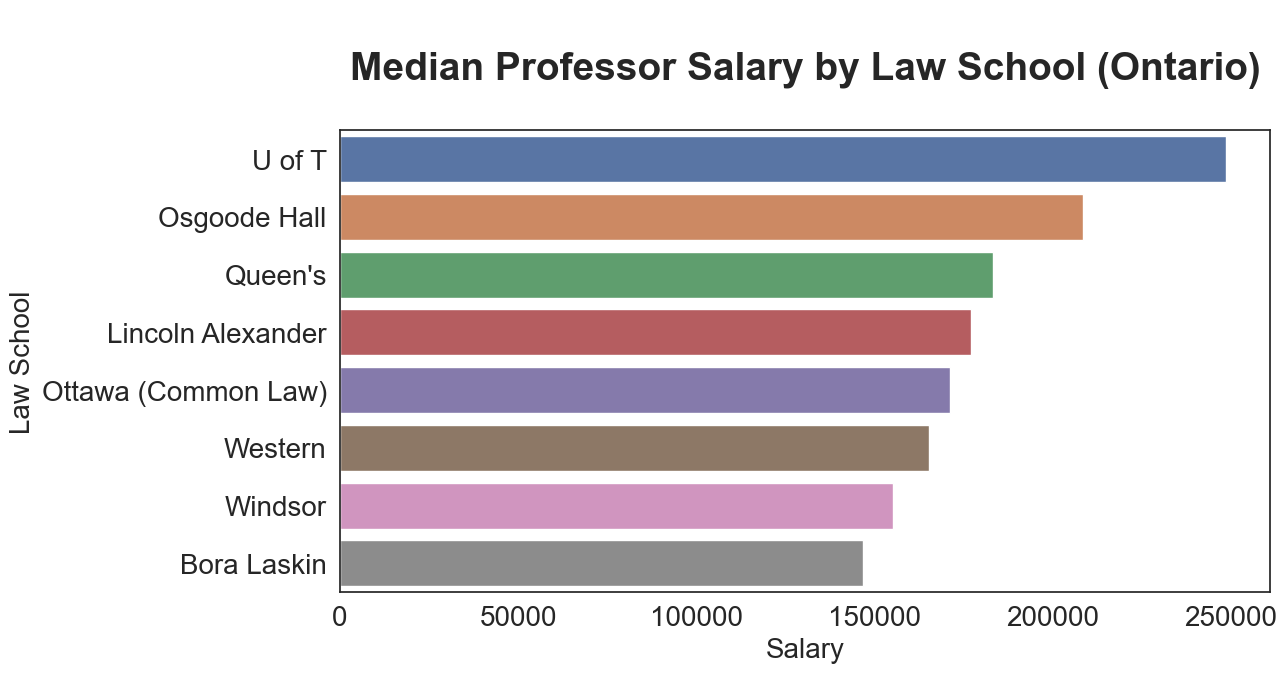

In [26]:
# bar chart with median salary for each university, with univerity as y axis (sorted by salary) and salary as x axis
sns.set_palette('Blues_d')
sns.set_theme(style="white")
ax = sns.barplot(x="Salary", y="university", data=df_merged, order=df_merged.groupby('university')['Salary'].median().sort_values(ascending=False).index, errorbar=None)
ax.set_title('\nMedian Professor Salary by Law School (Ontario)\n', fontweight='bold', fontsize=28)
ax.set_xlabel('Salary', fontsize=20)
ax.set_ylabel('Law School', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().set_size_inches(12, 6)
plt.show()





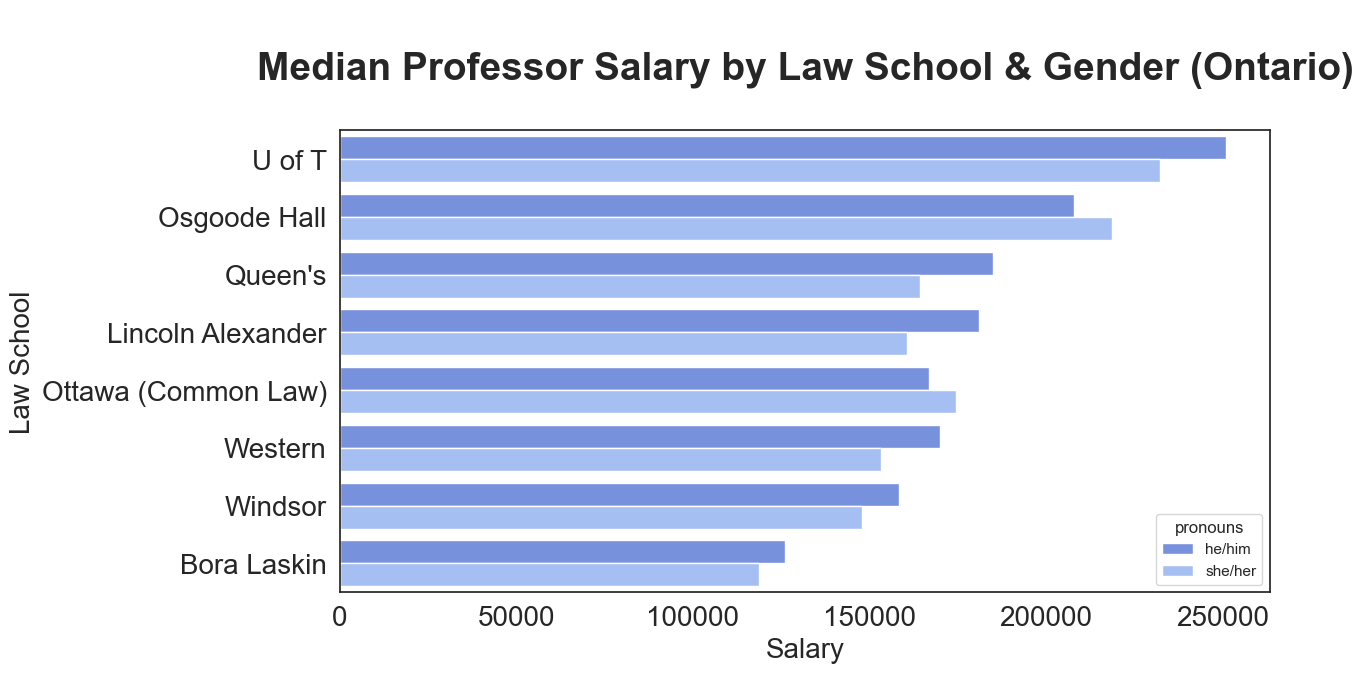

In [27]:
# groupby to get university and pronouns, then get the median salary for each group
df_grouped = df_pronouns.groupby(['university', 'pronouns'])['Salary'].median().reset_index()
df_grouped

#make bar chart from df_grouped
sns.set_theme(style="white")
sns.set_palette('coolwarm')
ax = sns.barplot(x="Salary", y="university", hue="pronouns", data=df_grouped, order=df_grouped.groupby('university')['Salary'].median().sort_values(ascending=False).index, errorbar=None)
ax.set_title('\nMedian Professor Salary by Law School & Gender (Ontario)\n', fontweight='bold', fontsize=28)
ax.set_xlabel('Salary', fontsize=20)
ax.set_ylabel('Law School', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gcf().set_size_inches(12, 6)
plt.show()



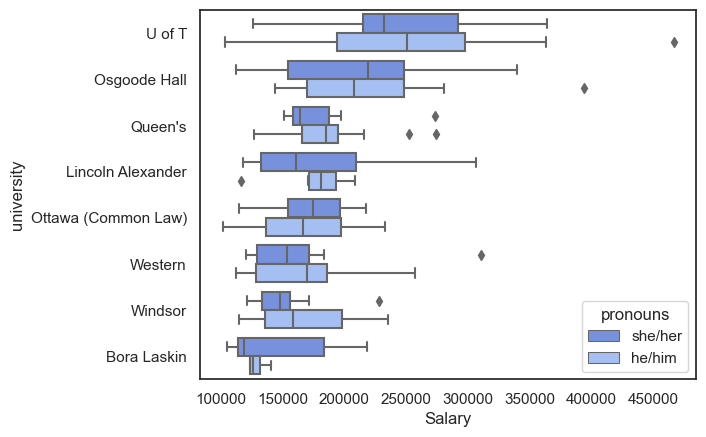

In [28]:
# Box plot of salary by university and pronouns, with univesrity as y axis
sns.set_theme(style="white")
sns.set_palette('coolwarm')
ax = sns.boxplot(x="Salary", y="university", hue="pronouns", data=df_pronouns, order=df_pronouns.groupby('university')['Salary'].median().sort_values(ascending=False).index)









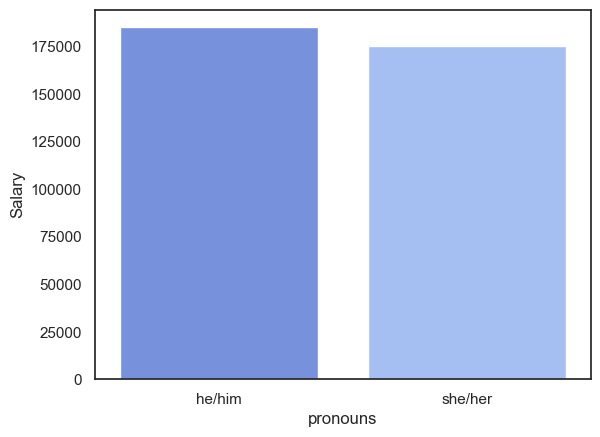

In [29]:

groupby = df_pronouns.groupby('pronouns')['Salary'].median().sort_values(ascending=False).reset_index()

# bar chart based on groupby, with pronouns as x asis
sns.set_theme(style="white")
sns.set_palette('coolwarm')
ax = sns.barplot(x="pronouns", y="Salary", data=groupby, errorbar=None)


In [18]:
# iterate through df merged, and print bio
for index, row in df_merged.iterrows():
    print(row['bio'])
    print('-------------------------')
    print()

I am an Associate Professor at Osgoode Hall Law School. I am also a research Fellow at the Dahdaleh Institute for Global Health Research at York University, and a Senior Fellow at Melbourne University Law School. My first book, All Is Well: Catastrophe and the Making of the Normal State was published by Oxford University Press in 2022. In All Is Well, I offer a history of the mutually constitutive relationship between disasters and states during the eighteenth-century and show the enduring influence of the underlying narratives, instincts, techniques, and practices on global disaster management today. I am currently working on two book projects. The first examines the history of war, environmental degradation/disasters, and human displacement from 1860 to the present. This research is funded by a Social Sciences and Humanities Council Insight Development Grant and supported by Osgoode Hall Law School, York University’s Center for Refugee Studies, and the Dahdaleh Institute for Global H